In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelBB05A_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/BB05A.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

,time,ammonia nitrogen
0,0.000000,0.406250
1,0.006279,0.312500
2,0.013343,0.406250
3,0.020407,0.281250
4,0.027471,0.343750
...,...,...
265,0.985871,0.000000
266,0.989011,0.000000
267,0.992936,0.000000
268,0.996081,0.000000


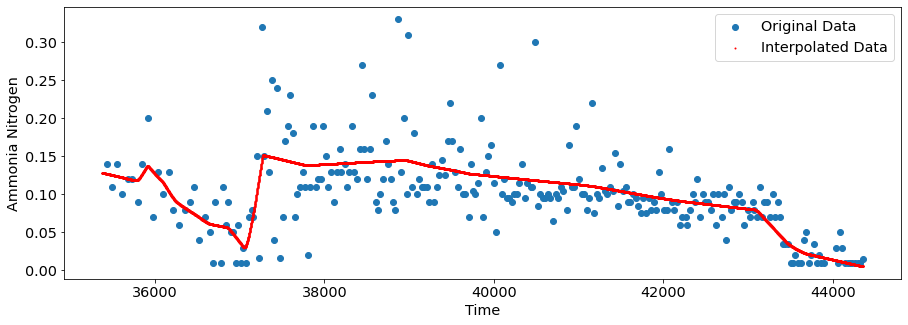

313/313 [==============================] - 0s 332us/step - loss: 3.0433e-16
['loss']


In [3]:
#Transform the normalized scale to real scale
AN_min = 0.01
AN_max = 0.33
time_min = 35436.00  
time_max = 44354.46  

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [6]:
interpolation = model.predict([0.003475936
,0.010091426
,0.016931171
,0.023770915
,0.03061066
,0.037450404
,0.044402276
,0.051017766
,0.057857511
,0.068173191
,0.071537
,0.078376744
,0.085328616
,0.091944106
,0.098783851
,0.105623595
,0.11246334
,0.119303084
,0.126254956
,0.132982573
,0.952070008
,0.955433816
,0.958909752
                               
,0.146662062
])
interpolation

array([[0.36325476],
       [0.35852903],
       [0.35355437],
       [0.34836686],
       [0.34315428],
       [0.34038094],
       [0.3542961 ],
       [0.38615835],
       [0.3858408 ],
       [0.3504105 ],
       [0.34015325],
       [0.31022522],
       [0.27602392],
       [0.25106803],
       [0.234757  ],
       [0.22086805],
       [0.20697916],
       [0.19307637],
       [0.17734018],
       [0.16466177],
       [0.01882366],
       [0.01646005],
       [0.01401796],
       [0.15344378]], dtype=float32)